In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
SAMPLE_RATE = 48000
SEGMENT_SIZE = int(1 * SAMPLE_RATE)
OVERLAP = int(0.5 * SAMPLE_RATE)

In [3]:
dir_xc = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"
dir_k = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

list_xc = [os.path.join(dir_xc, x) for x in os.listdir(dir_xc)]
list_k = [os.path.join(dir_k, x) for x in os.listdir(dir_k)]

dataset_xc = {os.path.basename(file): librosa.load(file, sr=SAMPLE_RATE)[0] for file in list_xc}
dataset_k = {os.path.basename(file): librosa.load(file, sr=SAMPLE_RATE)[0] for file in list_k}

In [4]:
def segment_audio(audio, sr, segment_size, overlap):
    segments = []
    times = []
    step = segment_size - overlap
    for start in range(0, len(audio) - segment_size + 1, step):
        end = start + segment_size
        segments.append(audio[start:end])
        times.append(start / sr)
    return segments, np.array(times)

In [5]:
def calculate_rmsenergy(segment):
    segment = segment.flatten()
    
    rms = np.mean()
    rms_list.append(rms)

In [6]:
def feature_extractor(segments, sr):
    feature_names = [
        'Mean RMS Energy',
        'ZCR'
    ]
    
    features_list = []
    for segment in segments:
        segment = segment.flatten()
        rms = np.mean(librosa.feature.rms(y=segment))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=segment))
        
        features_list.append([rms, zcr])
    
    return np.array(features_list), feature_names

In [7]:
def visualize_features(features, feature_names, time_axis, file_name):
    colors = ['orange', 'blue']
    plt.figure(figsize=(14, 2 * features.shape[1]))
    for i in range(features.shape[1]):
        plt.subplot(features.shape[1], 1, i + 1)
        plt.plot(time_axis, features[:, i], label=feature_names[i],
                 color=colors[i], marker='o', markersize=3, linewidth=1)
        plt.ylabel(feature_names[i])
        plt.grid(True)
        if i != features.shape[1] - 1:
            plt.tick_params(labelbottom=False)
        else:
            plt.xlabel('Time (seconds)')
            xticks = np.arange(0, time_axis[-1] + 0.5, 0.5)
            plt.xticks(xticks)
    plt.suptitle(f'{file_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [8]:
def visualize_standard_scaled_features(features, feature_names, time_axis, file_name):
    colors = ['black', 'blue', 'green', 'red', 'orange']
    plt.figure(figsize=(24, 6))
    for i in range(features.shape[1]):
        plt.plot(time_axis, features[:, i], label=feature_names[i],
                 color=colors[i], marker='o', markersize=3, linewidth=1)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Standard Scaled Value')
    plt.title(f'{file_name} (All Standard Scaled Features)')
    plt.grid(True)
    xticks = np.arange(0, time_axis[-1] + 0.5, 0.5)
    plt.xticks(xticks)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
file_name = "151761.mp3"
audio = dataset_xc[file_name]
segments, time_axis = segment_audio(audio, SAMPLE_RATE, SEGMENT_SIZE, OVERLAP)
features, feature_names = feature_extractor(segments, SAMPLE_RATE)

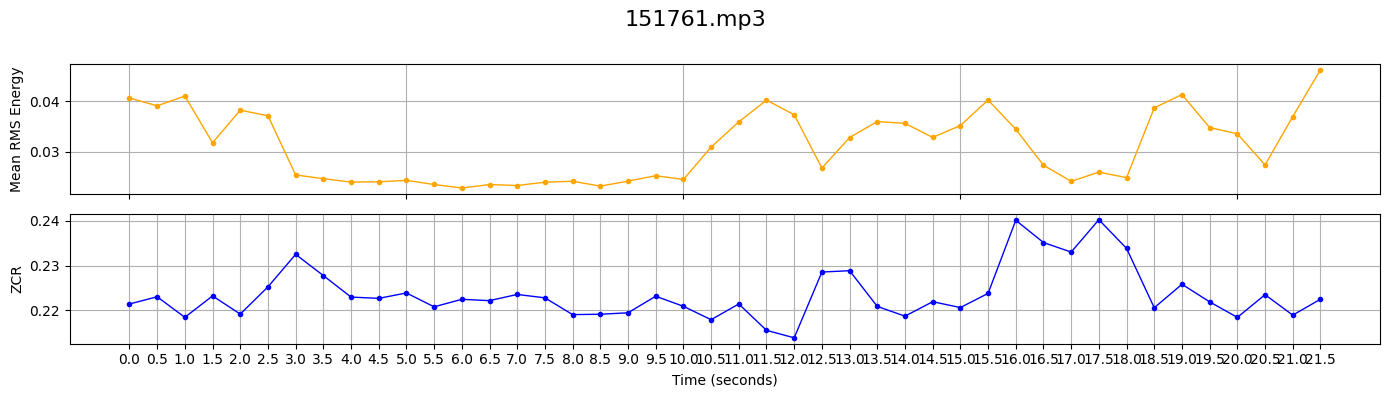

In [10]:
visualize_features(features, feature_names, time_axis, file_name)

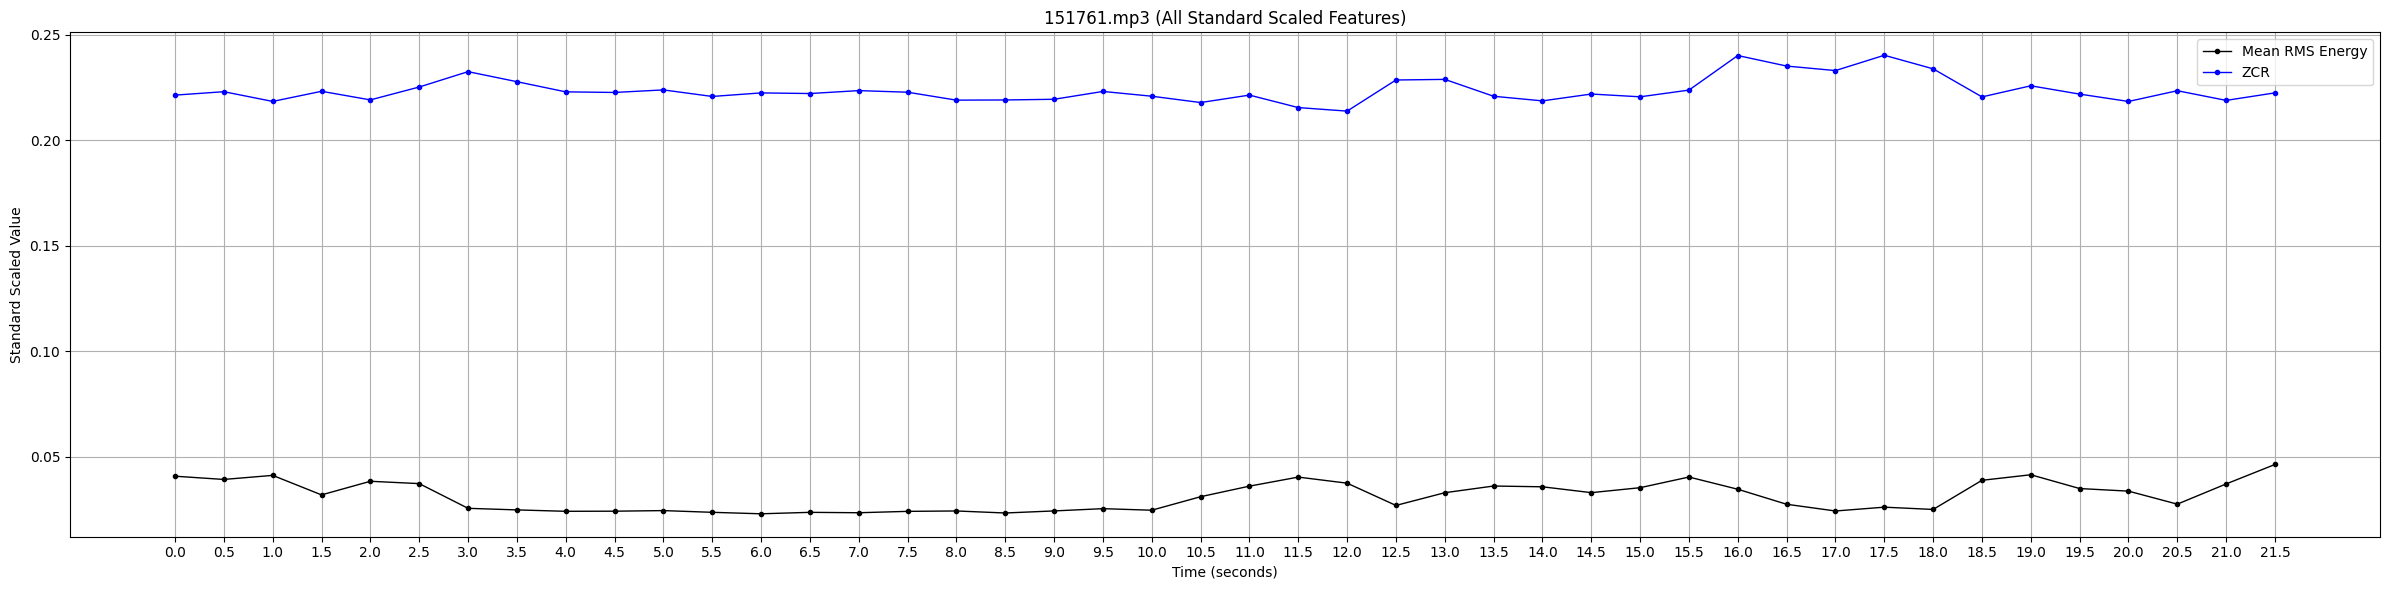

In [11]:
visualize_standard_scaled_features(features, feature_names, time_axis, file_name)